In [1]:
#installing all required packages for the project
from numpy import where
import numpy as np
import pandas as pd
from sklearn import preprocessing
from pandas import DataFrame

#installing the pyspark packages for the further analysis
from pyspark.sql import SparkSession, Window
from pyspark.sql import functions as F
from pyspark.sql.functions import regexp_extract
from pyspark.sql.types import IntegerType
from pyspark.sql.types import StringType
from matplotlib import pyplot as plt
import matplotlib.patches as mpatches
from pyspark.sql.functions import col,isnan, when, count
from pyspark.sql.functions import *


from collections import Counter
from sklearn.datasets import make_classification
from matplotlib import pyplot
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

from time import time
from packaging import version

from matplotlib import pyplot
from matplotlib import pyplot as plt
import seaborn as sns
import missingno as msno

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from scipy.special import boxcox1p

from statsmodels.stats.outliers_influence import variance_inflation_factor

from sklearn.impute import KNNImputer
from sklearn.feature_selection import VarianceThreshold
from scipy import stats
from pylab import *

from sklearn.inspection import permutation_importance
from sklearn.feature_selection import RFE

import matplotlib.patches as mpatches
from sklearn.feature_selection import SelectKBest, chi2

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report,plot_confusion_matrix,plot_roc_curve
from sklearn import linear_model
from keras import models, layers
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import NearestNeighbors
from sklearn.linear_model import SGDClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn import neighbors
from sklearn.model_selection import GridSearchCV
from sklearn.datasets import make_classification
from imblearn.over_sampling import SMOTE
from xgboost import XGBClassifier

In [2]:
import pandas as pd

DF_15 = pd.read_excel(r'C:\Users\akash\Desktop\ANALYSIS\all_category.xlsx')

In [3]:
#delete the first unwanted index row
DF_15 = DF_15.iloc[:,1:]

In [4]:
#target variable 1 to 7 are considered for the analysis


# input split
X = DF_15.drop(columns=['DEGREE_INJURY_CD'], axis=1)
y = DF_15['DEGREE_INJURY_CD']


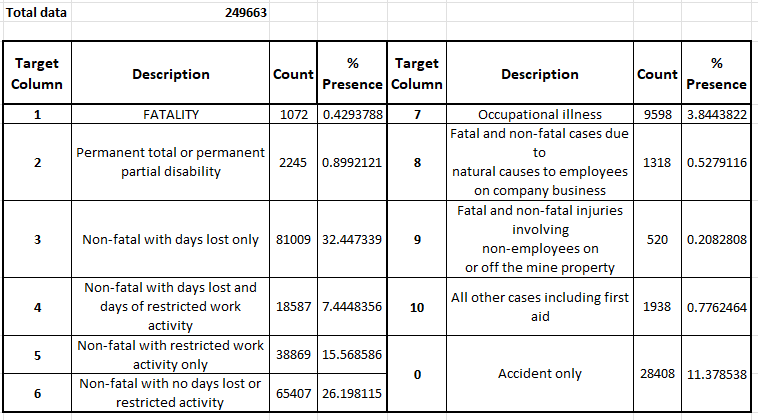

In [5]:
# summarize class distribution
counter = Counter(y)
print("counter",counter)

counter Counter({3: 66806, 6: 58344, 5: 36613, 4: 16654, 7: 5984, 2: 2029, 1: 905})


In [6]:
#copying the DF
x_data = X.copy()


In [7]:
#copying the DF
y_data = y.copy()

# SMOTE balancing technique

In [8]:
from imblearn.over_sampling import SMOTE
oversample = SMOTE(random_state = 42)
x_data, y_data = oversample.fit_resample(X, y)

In [9]:
# summarize class distribution
counter = Counter(y_data)
print("counter",counter)

counter Counter({5: 66806, 6: 66806, 3: 66806, 4: 66806, 2: 66806, 7: 66806, 1: 66806})


In [10]:
# separate dataset into train and test

X_train, X_test, y_train, y_test = train_test_split(
    x_data,
    y_data,
    test_size=0.3,
    random_state=0)

X_train.shape, X_test.shape

((327349, 69), (140293, 69))

In [11]:
print(X_train.shape)
print(X_test.shape)

(327349, 69)
(140293, 69)


# D. Feature selection using RFE

In [12]:
rfe = RFE(estimator=DecisionTreeClassifier(), n_features_to_select=20)
rfe.fit(X_train, y_train)

RFE(estimator=DecisionTreeClassifier(), n_features_to_select=20)

In [13]:
for i, col in zip(range(X.shape[1]), X.columns):
    print(f"{col} selected={rfe.support_[i]} rank={rfe.ranking_[i]}")

SLIP OR FALL OF PERSON selected=False rank=5
HANDTOOLS (NONPOWERED) selected=False rank=20
MACHINERY selected=False rank=10
POWERED HAULAGE selected=False rank=7
FALL OF ROOF OR BACK selected=False rank=48
OTHER selected=False rank=38
DISORDERS (REPEATED TRAUMA) selected=True rank=1
STEPPING OR KNEELING ON OBJECT selected=False rank=47
STRIKING OR BUMPING selected=False rank=50
Struck by... NEC selected=True rank=1
Over-exertion NEC selected=False rank=14
Struck by falling object selected=False rank=12
Over-exertion in lifting objects selected=False rank=21
Caught in, under or between a moving and a stationary object selected=False rank=31
Struck against stationary object selected=False rank=13
Fall to the walkway or working surface selected=False rank=45
Struck against a moving object selected=False rank=35
Struck by flying object selected=False rank=15
Caught in, under or between NEC selected=False rank=42
FRACTURE,CHIP selected=True rank=1
CONTUSN,BRUISE,INTAC SKIN selected=False ra

In [14]:
col = X_train.columns[rfe.support_]
col

Index(['DISORDERS (REPEATED TRAUMA)', 'Struck by... NEC', 'FRACTURE,CHIP',
       'MULTIPLE INJURIES', 'CRUSHING', 'FINGER(S)/THUMB', 'FISCAL_QTR_2',
       'FISCAL_QTR_3', 'FISCAL_QTR_4', 'CURRENT_MINE_TYPE_3',
       'CURRENT_MINE_STATUS_3', 'MINE_EXPER_01_2', 'MINE_EXPER_01_3',
       'JOB_EXPER_01_2', 'JOB_EXPER_01_3', 'JOB_EXPER_01_5',
       'ACCIDENT_TIME_1500', 'ACCIDENT_TIME_2300', 'FISCAL_YR', 'DAYS_LOST'],
      dtype='object')

In [15]:
col.value_counts().sum()

20

In [16]:
X_train.columns[~rfe.support_]

Index(['SLIP OR FALL OF PERSON', 'HANDTOOLS (NONPOWERED)', 'MACHINERY',
       'POWERED HAULAGE', 'FALL OF ROOF OR BACK', 'OTHER',
       'STEPPING OR KNEELING ON OBJECT', 'STRIKING OR BUMPING',
       'Over-exertion NEC', 'Struck by falling object',
       'Over-exertion in lifting objects',
       'Caught in, under or between a moving and a stationary object',
       'Struck against stationary object',
       'Fall to the walkway or working surface',
       'Struck against a moving object', 'Struck by flying object',
       'Caught in, under or between NEC', 'CONTUSN,BRUISE,INTAC SKIN',
       'UNCLASSIFIED,NOT DETERMED', 'BURN OR SCALD (HEAT)',
       'JOINT,TENDON,MUSCL INFLAM', 'BURN,CHEMICL-FUME,COMPOUN',
       'BACK (MUSCLES/SPINE/S-CORD/TAILBONE)', 'KNEE/PATELLA',
       'SHOULDERS (COLLARBONE/CLAVICLE/SCAPULA)', 'EYE(S) OPTIC NERVE/VISON',
       'MULTIPLE PARTS (MORE THAN ONE MAJOR)', 'HAND (NOT WRIST OR FINGERS)',
       'ANKLE', 'WRIST', 'FOOT(NOT ANKLE/TOE)/TARSUS/METATAR

In [17]:
# Creating X_test dataframe with RFE selected variables
X_train_rfe_model_1 = X_train[col]

In [18]:
#top 20 best predictors
X_train_rfe_model_1.columns

Index(['DISORDERS (REPEATED TRAUMA)', 'Struck by... NEC', 'FRACTURE,CHIP',
       'MULTIPLE INJURIES', 'CRUSHING', 'FINGER(S)/THUMB', 'FISCAL_QTR_2',
       'FISCAL_QTR_3', 'FISCAL_QTR_4', 'CURRENT_MINE_TYPE_3',
       'CURRENT_MINE_STATUS_3', 'MINE_EXPER_01_2', 'MINE_EXPER_01_3',
       'JOB_EXPER_01_2', 'JOB_EXPER_01_3', 'JOB_EXPER_01_5',
       'ACCIDENT_TIME_1500', 'ACCIDENT_TIME_2300', 'FISCAL_YR', 'DAYS_LOST'],
      dtype='object')

In [19]:
#loading top best predictors for the modeling

x_data = DF_15[['DISORDERS (REPEATED TRAUMA)', 'Struck by... NEC', 'FRACTURE,CHIP',
       'MULTIPLE INJURIES', 'CRUSHING', 'FINGER(S)/THUMB', 'FISCAL_QTR_2',
       'FISCAL_QTR_3', 'FISCAL_QTR_4', 'CURRENT_MINE_TYPE_3',
       'CURRENT_MINE_STATUS_3', 'MINE_EXPER_01_2', 'MINE_EXPER_01_3',
       'JOB_EXPER_01_2', 'JOB_EXPER_01_3', 'JOB_EXPER_01_5',
       'ACCIDENT_TIME_1500', 'ACCIDENT_TIME_2300', 'FISCAL_YR', 'DAYS_LOST']]
y_data = DF_15['DEGREE_INJURY_CD']
print("y_data",y_data)

y_data 0         5
1         5
2         6
3         6
4         3
         ..
187330    3
187331    3
187332    3
187333    3
187334    3
Name: DEGREE_INJURY_CD, Length: 187335, dtype: int64


In [20]:
print("y_data",y_data.value_counts())
print("y_data",y_data.unique())

y_data 3    66806
6    58344
5    36613
4    16654
7     5984
2     2029
1      905
Name: DEGREE_INJURY_CD, dtype: int64
y_data [5 6 3 4 2 7 1]


In [21]:
# summarize class distribution
counter = Counter(y_data)
print("counter",counter)

counter Counter({3: 66806, 6: 58344, 5: 36613, 4: 16654, 7: 5984, 2: 2029, 1: 905})


In [22]:
from imblearn.over_sampling import SMOTE
oversample = SMOTE(random_state = 42)
x_data, y_data = oversample.fit_resample(x_data, y_data)

In [23]:
# summarize class distribution
counter = Counter(y_data)
print("counter",counter)

counter Counter({5: 66806, 6: 66806, 3: 66806, 4: 66806, 2: 66806, 7: 66806, 1: 66806})


# Modeling

# Model 1: Random Forest

# 1.1 without tuning

In [24]:
#test and train split 
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data ,test_size = 0.3, random_state=0)

In [25]:
x_train.shape

(327349, 20)

In [26]:
x_test.shape

(140293, 20)

In [27]:
rf = RandomForestClassifier()
rf.fit(x_train, y_train)
print(rf.score(x_test, y_test))
# generating classification report for the model
print("[INFO] evaluating RandomForestClassifier...")
y_pred = rf.predict(x_test)

0.7405715181798094
[INFO] evaluating RandomForestClassifier...


**Training and Testing results**

Training accuracy of Random Forest is : 0.9244414982174988
Test accuracy of Random Forest is : 0.7405715181798094
[[18673   327   137   239   358   124   267]
 [  345 17369   321   502   576   475   358]
 [  277   594 13842  3902   672   721   227]
 [  295   607  3792 14511   310   166   413]
 [  352   483   910   439 12101  4888   651]
 [  278   525  1200   230  6647 10715   393]
 [  360   426   377   653  1130   449 16686]]
              precision    recall  f1-score   support

           1       0.91      0.93      0.92     20125
           2       0.85      0.87      0.86     19946
           3       0.67      0.68      0.68     20235
           4       0.71      0.72      0.72     20094
           5       0.56      0.61      0.58     19824
           6       0.61      0.54      0.57     19988
           7       0.88      0.83      0.85     20081

    accuracy                           0.74    140293
   macro avg       0.74      0.74      0.74    140293
weighted avg       0.74     

Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.


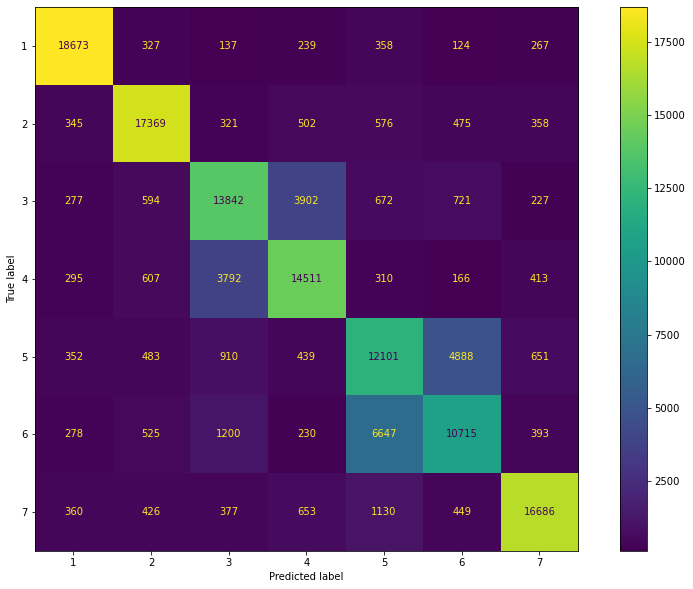

In [28]:
# accuracy_score, confusion_matrix and classification_report

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report,plot_confusion_matrix,plot_roc_curve

rand_clf_train_acc = accuracy_score(y_train, rf.predict(x_train))
rand_clf_test_acc = accuracy_score(y_test, y_pred)

print(f"Training accuracy of Random Forest is : {rand_clf_train_acc}")
print(f"Test accuracy of Random Forest is : {rand_clf_test_acc}")

print(confusion_matrix(y_test, y_pred))
fig = plt.figure(figsize=(15, 10))

print(classification_report(y_test, y_pred))
plot_confusion_matrix(rf, x_test,y_test, ax=fig.gca(),values_format='d')
#plot_roc_curve(rf, x_test,y_test)

[[46247    58     4     2   337    28     5]
 [   51 46196    13     6   384   191    19]
 [   19    32 44912   834   371   295   108]
 [    3    15   747 45750   100    62    35]
 [  352   348   350    87 39998  5147   700]
 [  262   509   391    84 10242 34758   572]
 [   50    20    98    47  1366   390 44754]]
              precision    recall  f1-score   support

           1       0.98      0.99      0.99     46681
           2       0.98      0.99      0.98     46860
           3       0.97      0.96      0.96     46571
           4       0.98      0.98      0.98     46712
           5       0.76      0.85      0.80     46982
           6       0.85      0.74      0.79     46818
           7       0.97      0.96      0.96     46725

    accuracy                           0.92    327349
   macro avg       0.93      0.92      0.92    327349
weighted avg       0.93      0.92      0.92    327349



Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.


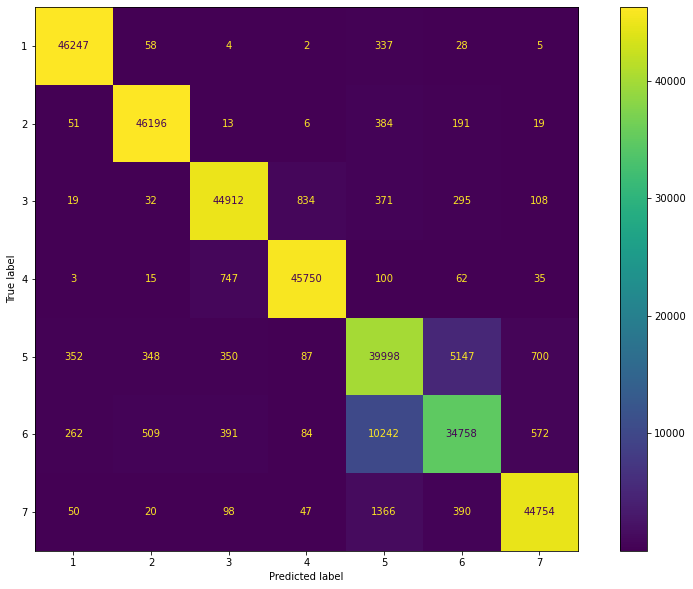

In [29]:
#Train results matrix

print(confusion_matrix(y_train, rf.predict(x_train)))
test_pred = rf.predict(x_train)
print(classification_report(y_train, rf.predict(x_train)))
fig = plt.figure(figsize=(15, 10))
plot_confusion_matrix(rf, x_train,y_train, ax=fig.gca(),values_format= 'd')

# check for feature importance


In [30]:
# view the feature scores
feature_scores = pd.Series(rf.feature_importances_, index=x_train.columns).sort_values(ascending=False)
print('The importance of features ranked from high to low:\n',feature_scores)

The importance of features ranked from high to low:
 FISCAL_YR                      0.285180
DAYS_LOST                      0.275603
DISORDERS (REPEATED TRAUMA)    0.090856
FINGER(S)/THUMB                0.063583
CRUSHING                       0.045117
MULTIPLE INJURIES              0.044117
Struck by... NEC               0.021865
FRACTURE,CHIP                  0.020029
CURRENT_MINE_TYPE_3            0.017188
ACCIDENT_TIME_1500             0.015899
CURRENT_MINE_STATUS_3          0.015318
FISCAL_QTR_3                   0.012836
FISCAL_QTR_4                   0.012812
MINE_EXPER_01_2                0.012325
ACCIDENT_TIME_2300             0.012180
FISCAL_QTR_2                   0.011991
JOB_EXPER_01_2                 0.011504
JOB_EXPER_01_3                 0.010693
MINE_EXPER_01_3                0.010623
JOB_EXPER_01_5                 0.010282
dtype: float64


# 1.1 With Hyper parameter tuning

In [31]:
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 10, stop = 80, num = 10)]
# Number of features to consider at every split
# Maximum number of levels in tree
max_depth = [2,4,6]
# Minimum number of samples required to split a node
min_samples_split = [2, 5]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2]
# Method of selecting samples for training each tree
bootstrap = [True, False]

In [32]:
# Create the param grid
param_grid = {'n_estimators': n_estimators,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
print(param_grid)

{'n_estimators': [10, 17, 25, 33, 41, 48, 56, 64, 72, 80], 'max_depth': [2, 4, 6], 'min_samples_split': [2, 5], 'min_samples_leaf': [1, 2], 'bootstrap': [True, False]}


In [33]:
rf_Model = RandomForestClassifier()

In [34]:
rf_Grid = GridSearchCV(estimator = rf_Model, param_grid = param_grid, cv = 3, verbose=2, n_jobs = 4)

In [35]:
rf_Grid.fit(x_train, y_train)

Fitting 3 folds for each of 240 candidates, totalling 720 fits


GridSearchCV(cv=3, estimator=RandomForestClassifier(), n_jobs=4,
             param_grid={'bootstrap': [True, False], 'max_depth': [2, 4, 6],
                         'min_samples_leaf': [1, 2],
                         'min_samples_split': [2, 5],
                         'n_estimators': [10, 17, 25, 33, 41, 48, 56, 64, 72,
                                          80]},
             verbose=2)

In [36]:
rf_Grid.best_params_

{'bootstrap': False,
 'max_depth': 6,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 48}

In [37]:
rf = RandomForestClassifier(n_estimators=48, max_depth = 6, bootstrap = False,
                             min_samples_leaf = 1,min_samples_split = 2,class_weight = 'balanced')
rf.fit(x_train, y_train)
print(rf.score(x_test, y_test))
# generating classification report for the model
print("[INFO] evaluating RandomForestClassifier...")
y_pred = rf.predict(x_test)
#print(classification_report(y_test, preds,
#target_names=['3', '6', '5', '4', '7', '2', '1']))

0.5815899581589958
[INFO] evaluating RandomForestClassifier...


In [38]:
# accuracy_score, confusion_matrix and classification_report
#test results
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report,plot_confusion_matrix,plot_roc_curve

rand_clf_train_acc = accuracy_score(y_train, rf.predict(x_train))
rand_clf_test_acc = accuracy_score(y_test, y_pred)

print(f"Training accuracy of Random Forest is : {rand_clf_train_acc}")
print(f"Test accuracy of Random Forest is : {rand_clf_test_acc}")

print(confusion_matrix(y_test, y_pred))

print(classification_report(y_test, y_pred))



Training accuracy of Random Forest is : 0.579131141381217
Test accuracy of Random Forest is : 0.5815899581589958
[[12785     0   752  2723  3176   687     2]
 [    4 12287  1795  3359  2141   354     6]
 [  675   965  9652  8677   152   114     0]
 [  333   959  3820 14891    74    16     1]
 [  336  1267   857  1621 12604  3111    28]
 [  263  2436   986   720  8112  7442    29]
 [   41     5   648  2216  4637   602 11932]]
              precision    recall  f1-score   support

           1       0.89      0.64      0.74     20125
           2       0.69      0.62      0.65     19946
           3       0.52      0.48      0.50     20235
           4       0.44      0.74      0.55     20094
           5       0.41      0.64      0.50     19824
           6       0.60      0.37      0.46     19988
           7       0.99      0.59      0.74     20081

    accuracy                           0.58    140293
   macro avg       0.65      0.58      0.59    140293
weighted avg       0.65      

Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.


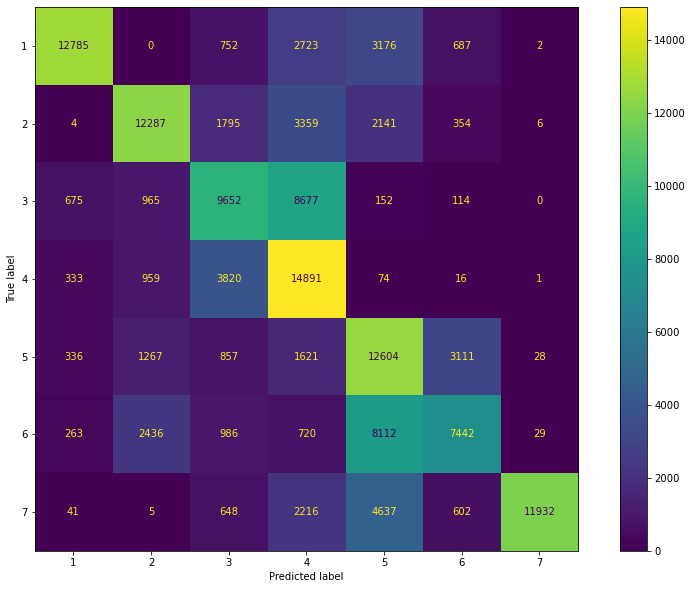

In [39]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(15, 10))

plot_confusion_matrix(rf, x_test,y_test, ax=fig.gca(),values_format='d')

[[29699     1  1713  6241  7608  1416     3]
 [   12 28841  4106  8004  4972   895    30]
 [ 1575  2168 21829 20377   320   300     2]
 [  810  2150  8994 34591   141    26     0]
 [  787  3223  2044  3663 29694  7515    56]
 [  617  5633  2333  1641 19106 17413    75]
 [  113    11  1600  5090 10998  1402 27511]]
              precision    recall  f1-score   support

           1       0.88      0.64      0.74     46681
           2       0.69      0.62      0.65     46860
           3       0.51      0.47      0.49     46571
           4       0.43      0.74      0.55     46712
           5       0.41      0.63      0.50     46982
           6       0.60      0.37      0.46     46818
           7       0.99      0.59      0.74     46725

    accuracy                           0.58    327349
   macro avg       0.65      0.58      0.59    327349
weighted avg       0.65      0.58      0.59    327349



Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.


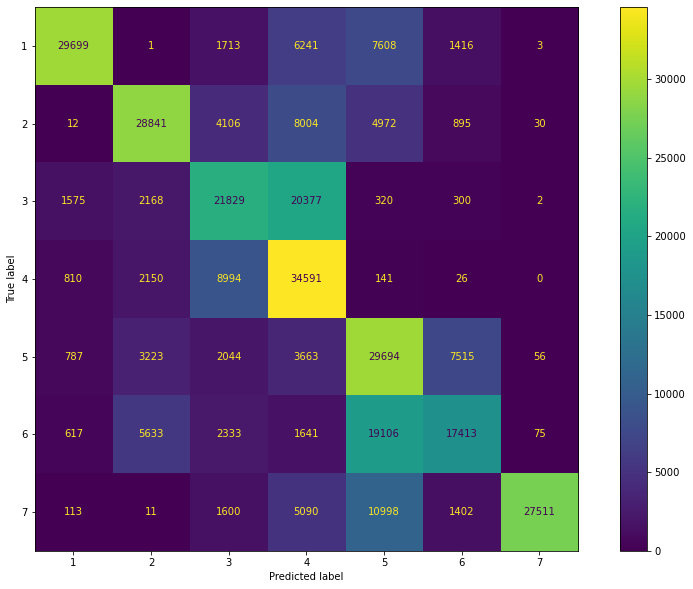

In [40]:
#train results

print(confusion_matrix(y_train, rf.predict(x_train)))
test_pred = rf.predict(x_train)
print(classification_report(y_train, rf.predict(x_train)))

fig = plt.figure(figsize=(15, 10))
plot_confusion_matrix(rf, x_train,y_train, ax=fig.gca(),values_format='d')

# Diffrent combination of target variables, models, hyper parameters, normalization, feature selection and other iterations are done before going to case study 2, those process are not included to keep the code clean 